# OpenMC Tallies

Today we'll be getting some experience building basic tallies with OpenMC. As we've already covered model building, we'll use the PWR pincell model provided by the `openmc.examples` module.


1. Using a pincell power of 200 W/cm (this is a 2D model), create a tally with a heating score to determine the neutron source rate in the cell.
2. Use a tally with an `EnergyFilter` and "flux" score to plot the energy spectrum of the pincell.
3. Apply a `SurfaceFilter` to determine the partial currents of particles passing in and out of the cylindrical surface of the pin cladding. Examine the results in a pandas dataframe.
4. Create a `RegularMesh` object with 20 elements in the x and y dimensions and 1 elemnet in the z dimension with bounds that match the extents of the pincell model. Apply this mesh in a `MeshFilter` and use the resulting filter in a tally for the following scores in the pincell:

    - flux
    - absorption
    - scattering

    Plot the results for each score using `plt.imshow`.

In [1]:
import openmc
import numpy as np
from matplotlib import pyplot as plt

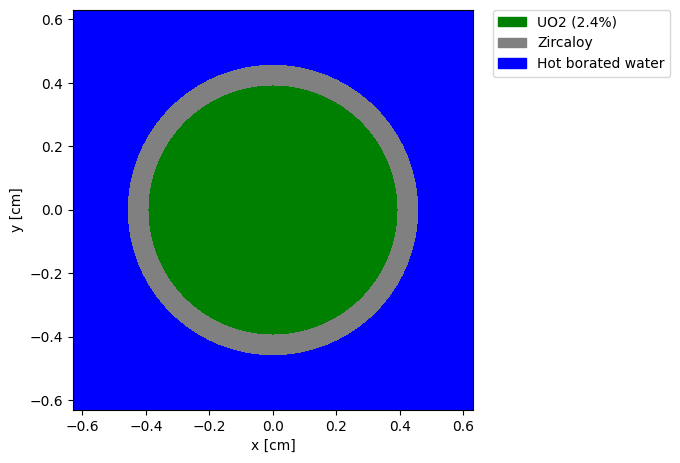

In [2]:
model = openmc.examples.pwr_pin_cell()
material_colors = ('green', 'gray', 'blue')
model.geometry.plot(pixels=(400, 400),
                    color_by='material',
                    colors={m: c for m, c in zip(model.materials, material_colors)},
                    legend=True)
plt.show()

In [3]:
# increae the number of particles and batches for slightly better statistics
model.settings.particles = 10000
model.settings.batches = 100
model.settings.inactive = 10